<div class="alert alert-block alert-danger">

# InvJNB: Are Emily and Greg More Employable Than Lakisha and Jamal?

**Standalone Investigation Notebook**  
**Use with CourseKata intro chapters or as standalone**  
**Kernel: R**

</div>


<div class="alert alert-block alert-warning">

#### Summary of Notebook

In 2004, researchers sent identical resumes with different names to job postings and recorded callback rates. This investigation explores whether names associated with different races affect callback rates, starting with gender comparisons and moving to race/name analysis. You will comprehensively explore the dataset, compute descriptive statistics, visualize patterns, and optionally use advanced techniques like shuffle tests and multiple variable analyses.

#### Includes

- Comprehensive data exploration (all 63 variables)
- Descriptive comparisons by gender and race
- Name-race relationship exploration
- Optional: Distribution triad and DGP concepts
- Optional: Shuffle tests for evaluating chance vs. pattern
- Optional: Multiple variable analysis and effect sizes

</div>


<div class="alert alert-block alert-success">

## Approximate time to complete Notebook: 60-140 mins (depends on optional sections)

**Core sections (1.0-5.0): 60-75 mins**  
**With all optional advanced sections: 120-140 mins**

</div>


<div class="alert alert-block alert-success">

### Intro — Approximate Time: 3-5 mins

</div>


### The 2004 Resume Study

In 2004, researchers Marianne Bertrand and Sendhil Mullainathan conducted a field experiment. They created resumes that were identical except for the names—some had names typically associated with White people (like Emily and Greg) and others had names typically associated with Black people (like Lakisha and Jamal). They sent these resumes to job postings and recorded which ones received callbacks.

**The Hiring Process:**
- Researchers responded to help-wanted ads in Boston and Chicago newspapers
- They sent nearly 5,000 resumes to over 1,300 employment ads
- The ads were for sales, administrative support, and clerical positions
- Resumes were randomly assigned names that were perceived as either distinctively White or distinctively Black
- Qualifications were kept similar across both groups (education, experience, skills)
- The key outcome: whether the applicant received a **callback** (a phone call or email requesting an interview)

**Key Research Questions:**
- Do names signal race to employers?
- Does this affect callback rates?
- What does this mean for creating effective resumes?

**Study Reference:**  
Bertrand, M., & Mullainathan, S. (2004). Are Emily and Greg More Employable Than Lakisha and Jamal? A Field Experiment on Labor Market Discrimination. *American Economic Review*, 94(4), 991-1013.



At the beginning of each notebook, load the packages you will use. Always run this first.


In [1]:
# Install coursekata if not already installed
if (!require("coursekata", quietly = TRUE)) {
    install.packages("coursekata", repos = "https://cloud.r-project.org", quiet = TRUE)
}

suppressPackageStartupMessages({
    library(coursekata)
    library(dplyr)
    library(tidyr)
})


Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2

Loading required package: dslabs

Loading required package: Metrics

Loading required package: lsr

Loading required package: mosaic


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: 'mosaic'


The following objects are masked from 'package:dplyr':

    count, do, tally


The following object is masked from 'package:Matrix':

    mean


The following object is masked from 'package:ggplot2':

    stat


The following objects are masked from 'package:stats':

    IQR, binom.test, cor, cor.test, cov, fivenum, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from 'package:base':

    max, mean, min, prod, range, sample, sum


Loading required package: supernova

-- CourseKata pa

<div class="alert alert-block alert-success">

### 1.0 — Approximate Time: 12-15 mins

</div>


## 1.0 — Comprehensive Data Exploration

Before analyzing anything, we need to understand what data we have. This dataset contains information about resumes sent to job postings and whether they received callbacks.

1.1 — Load the data and check its dimensions. How many rows (resumes) and columns (variables) are in this dataset? What does each row represent?


In [2]:
# Load data from the same folder as this notebook

df <- read.csv("labor_market_discrimination.csv")

# How many rows and columns?
dim(df)

# What does each row represent?
head(df, 3)


[1] 4870   63

,education,n_jobs,years_exp,honors,volunteer,military,emp_holes,occup_specific,occup_broad,work_in_school,...,comp_req,org_req,manuf,trans_com,bank_real,trade,bus_service,oth_service,miss_ind,ownership
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,4,2,6,0,0,0,1,17,1,0,...,1,0,1,0,0,0,0,0,0,
2,3,3,6,0,1,1,0,316,6,1,...,1,0,1,0,0,0,0,0,0,
3,4,1,6,0,0,0,0,19,1,1,...,1,0,1,0,0,0,0,0,0,


<div class="alert alert-block alert-warning">

**Sample Responses**
- Each row represents one resume sent to a job posting
- There are [X] resumes and 63 variables in the dataset
- Each row contains information about the resume characteristics, the job it was sent to, and the outcome (callback)

</div>


1.2 — Look at all the variable names. Which ones seem most relevant for studying callback rates? Try to categorize them: resume characteristics, job/context variables, and outcome variables.


In [3]:
# View all column names
names(df)
length(names(df))

# Print them in a more readable format
cat("Total variables:", length(names(df)), "\n\n")


[1] "education"            "n_jobs"               "years_exp"           
 [4] "honors"               "volunteer"            "military"            
 [7] "emp_holes"            "occup_specific"       "occup_broad"         
[10] "work_in_school"       "email"                "computer_skills"     
[13] "special_skills"       "first_name"           "sex"                 
[16] "race"                 "h"                    "l"                   
[19] "call"                 "city"                 "kind"                
[22] "ad_id"                "frac_black"           "frac_white"          
[25] "l_med_hh_inc"         "frac_dropout"         "frac_colp"           
[28] "l_inc"                "col"                  "exp_min_req"         
[31] "school_req"           "eoe"                  "parent_sales"        
[34] "parent_emp"           "branch_sales"         "branch_emp"          
[37] "fed"                  "frac_black_emp_zip"   "frac_white_emp_zip"  
[40] "l_med_hh_inc_emp_zip" "frac_dropout_emp_zip" "frac_colp_emp_zip"   
[43] "l_inc_emp_zip"        "manager"              "supervisor"          
[46] "secretary"            "off_support"          "sales_rep"           
[49] "retail_sales"         "req"                  "exp_req"             
[52] "com_req"              "educ_req"             "comp_req"            
[55] "org_req"              "manuf"                "trans_com"           
[58] "bank_real"            "trade"                "bus_service"         
[61] "oth_service"          "miss_ind"             "ownership"

[1] 63

Total variables: 63 



<div class="alert alert-block alert-warning">

**Sample Responses**

**Outcome variables:**
- `call` - whether resume received callback (main outcome)

**Resume characteristics:**
- `first_name`, `sex`, `race` - name and demographics
- `education`, `years_exp`, `n_jobs` - qualifications
- `honors`, `volunteer`, `military`, `computer_skills`, `special_skills` - additional resume features
- `emp_holes`, `occup_specific`, `occup_broad` - employment history details

**Job/context variables:**
- `city`, `kind`, `ad_id` - job posting identifiers
- `exp_min_req`, `school_req`, `eoe` - job requirements
- Many variables starting with `frac_` or `l_` - neighborhood characteristics
- Variables like `manager`, `supervisor`, etc. - job type indicators

</div>


1.3 — Use `glimpse()` to see the structure of the data. Which variables look categorical? Which look quantitative? What does `call` contain (0s and 1s)?


In [4]:
# Get a better view of the data structure
glimpse(df)


Rows: 4,870
Columns: 63
$ education            <int> 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 1, 4~
$ n_jobs               <int> 2, 3, 1, 4, 3, 2, 2, 4, 3, 2, 4, 4, 4, 2, 2, 3, 3~
$ years_exp            <int> 6, 6, 6, 6, 22, 6, 5, 21, 3, 6, 8, 8, 4, 4, 5, 4,~
$ honors               <int> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ volunteer            <int> 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1~
$ military             <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ emp_holes            <int> 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0~
$ occup_specific       <int> 17, 316, 19, 313, 313, 266, 13, 313, 316, 263, 37~
$ occup_broad          <int> 1, 6, 1, 5, 5, 4, 1, 5, 6, 4, 6, 6, 1, 1, 4, 6, 4~
$ work_in_school       <int> 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1~
$ email                <int> 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1~
$ computer_skills      <int> 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0~
$ special_skills

<div class="alert alert-block alert-warning">

**Sample Responses**
- `call` contains 0s and 1s: 0 = no callback, 1 = callback
- Categorical variables: `first_name`, `sex`, `race`, `city`, `kind`, `occup_broad`, etc.
- Quantitative variables: `education`, `years_exp`, `n_jobs`, variables with `frac_` (fractions), `l_` (logged values)

</div>


1.4 — Let's focus on the key variables we'll need for our analysis: `first_name`, `sex`, `race`, and `call` (the outcome). We'll also keep `education` and `years_exp` for later sections. Create a focused dataset with just these columns. What patterns do you notice in the first few rows?


In [5]:
# Create a focused dataset with only the key variables
df <- df %>% 
  select(first_name, sex, race, call, education, years_exp)

# Look at first few rows
head(df, 10)

# Check the dimensions
cat("\nFocused dataset dimensions:", dim(df)[1], "rows x", dim(df)[2], "columns\n")

# Check unique values for key categorical variables
cat("\nUnique values for sex:", unique(df$sex), "\n")
cat("Unique values for race:", unique(df$race), "\n")
cat("\nCallback outcomes:\n")
table(df$call)


,first_name,sex,race,call,education,years_exp
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Allison,f,w,0,4,6
2,Kristen,f,w,0,3,6
3,Lakisha,f,b,0,4,6
4,Latonya,f,b,0,3,6
5,Carrie,f,w,0,3,22
6,Jay,m,w,0,4,6
7,Jill,f,w,0,4,5
8,Kenya,f,b,0,3,21
9,Latonya,f,b,0,4,3



Focused dataset dimensions: 4870 rows x 6 columns

Unique values for sex: f m 
Unique values for race: w b 

Callback outcomes:



   0    1 
4478  392 

<div class="alert alert-block alert-warning">

**Sample Responses**
- Reduced the dataset from 63 variables to just 6 key variables
- Now `df` contains only: `first_name`, `sex`, `race`, `call`, `education`, `years_exp`
- `sex` has values "f" and "m" (female, male)
- `race` has values "w" and "b" (white, black)
- `call` is mostly 0s (no callback), some 1s (callback)
- First names vary - some may sound more associated with certain races
- Education and experience levels vary across resumes
- All future analysis will use this streamlined dataset

</div>


<div class="alert alert-block alert-success">

### 2.0 — Approximate Time: 5-7 mins

</div>


## 2.0 — Overall Callback Rate

Before comparing groups, let's establish a baseline: what's the overall callback rate?

2.1 — Compute the overall callback rate. What does this number represent in context?


In [6]:
mean(df$call, na.rm = TRUE)


[1] 0.08049281

<div class="alert alert-block alert-warning">

**Sample Responses**
- The overall callback rate is about [X] or [X%]
- This means [X] out of every 100 resumes sent received a callback
- This is our baseline for comparing groups

</div>


<div class="alert alert-block alert-success">

### 3.0 — Approximate Time: 10-12 mins

</div>


## 3.0 — Callback Rate by Gender

Let's start with a simple comparison: do callback rates differ by gender?

3.1 — Prediction (no code): Which gender do you expect to have a higher callback rate? Why?

3.2 — Compute callback rates by `sex`. What is the observed difference (Female - Male)?


In [7]:
# Counts by gender and callback status
tally(~ call + sex, data = df)

# Proportions by group
df %>% group_by(sex) %>% summarize(callback_rate = mean(call, na.rm = TRUE))

# Calculate the difference
callback_by_sex <- df %>% group_by(sex) %>% summarize(callback_rate = mean(call, na.rm = TRUE))
callback_f <- callback_by_sex$callback_rate[callback_by_sex$sex == "f"]
callback_m <- callback_by_sex$callback_rate[callback_by_sex$sex == "m"]
cat("\nDifference (Female - Male):", callback_f - callback_m)


    sex
call    f    m
   0 3437 1041
   1  309   83

sex,callback_rate
<chr>,<dbl>
f,0.08248799
m,0.07384342



Difference (Female - Male): 0.008644571

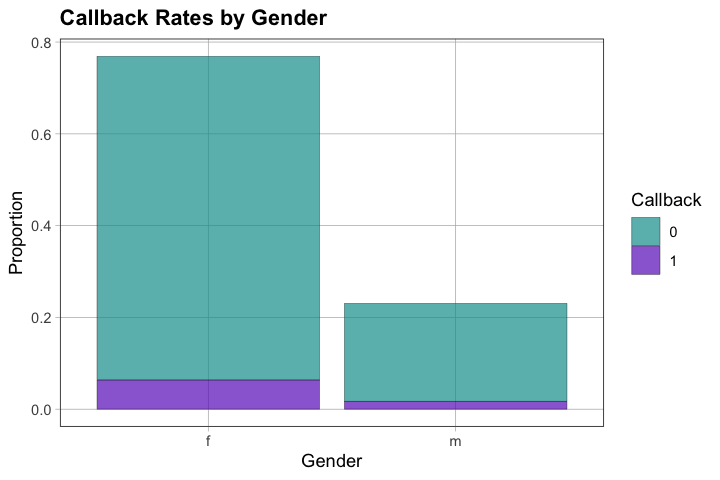

In [8]:
# Visualize the callback rates by gender
gf_props(~ sex, fill = ~ factor(call), data = df) %>%
  gf_labs(x = "Gender", fill = "Callback", y = "Proportion", 
          title = "Callback Rates by Gender")


3.3 — Interpret the difference in context. Avoid causal language—describe what you see in the data.

3.4 — Is this difference practically meaningful? What would make it more or less meaningful?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Prediction: Answers vary - no strong prior expectation, or expect small/no difference
- Rates: Female resumes had callback rate of [X], Male resumes had [Y], difference of [Z]
- Interpretation: In this dataset, resumes with female names had [X percentage points higher/lower] callback rate than resumes with male names
- Practical: Depends on volume of applications, stakes for individuals, fairness standards. Small differences matter when scaled up to many applications.

</div>


<div class="alert alert-block alert-success">

### 4.0 — Approximate Time: 15-18 mins

</div>


## 4.0 — Names, Race, and Callbacks

This is the core research question: Do names signal race, and does this affect callbacks?

4.1 — Explore the first names in the dataset. Look at some names associated with White applicants and some associated with Black applicants. Which names seem clearly associated with each group?


In [9]:
# Look at names by race
names_by_race <- df %>% select(first_name, race) %>% distinct() %>% arrange(race, first_name)

# White-sounding names
cat("Sample of White-sounding names:\n")
head(names_by_race %>% filter(race == "w") %>% pull(first_name), 15)

cat("\n\nSample of Black-sounding names:\n")
head(names_by_race %>% filter(race == "b") %>% pull(first_name), 15)


Sample of White-sounding names:


[1] "Allison"  "Anne"     "Brad"     "Brendan"  "Brett"    "Carrie"  
 [7] "Emily"    "Geoffrey" "Greg"     "Jay"      "Jill"     "Kristen" 
[13] "Laurie"   "Matthew"  "Meredith"



Sample of Black-sounding names:


[1] "Aisha"    "Darnell"  "Ebony"    "Hakim"    "Jamal"    "Jermaine"
 [7] "Kareem"   "Keisha"   "Kenya"    "Lakisha"  "Latonya"  "Latoya"  
[13] "Leroy"    "Rasheed"  "Tamika"

<div class="alert alert-block alert-warning">

**Sample Responses**
- White-sounding names: Emily, Greg, Allison, Kristen, Carrie, Geoffrey, Matthew, Todd, etc.
- Black-sounding names: Lakisha, Jamal, Latonya, Kenya, Aisha, Tyrone, Leroy, Tamika, Keisha, etc.
- Names do appear to be clearly associated with different racial groups

</div>


4.2 — Check the relationship between names and the race variable. Are names a good indicator of race in this dataset?


In [10]:
# Cross-tabulation of first_name and race
# Let's look at a few examples
df %>% 
  select(first_name, race) %>% 
  distinct() %>% 
  arrange(race, first_name) %>% 
  head(20)

# Check if names map perfectly to race
name_race_check <- df %>% 
  select(first_name, race) %>% 
  distinct() %>% 
  group_by(first_name) %>% 
  summarize(n_races = n_distinct(race), races = paste(unique(race), collapse = ", "))

# Are there any names that appear in both groups?
name_race_check %>% filter(n_races > 1)


,first_name,race
,<chr>,<chr>
1,Aisha,b
2,Darnell,b
3,Ebony,b
4,Hakim,b
5,Jamal,b
6,Jermaine,b
7,Kareem,b
8,Keisha,b
9,Kenya,b


first_name,n_races,races
<chr>,<int>,<chr>


4.3 — Research question: Are names indicative of race? Based on what you see, can employers infer race from names?

4.4 — Now compute callback rates by `race`. What is the difference?


In [11]:
# Counts by race and callback status
tally(~ call + race, data = df)

# Proportions by group
callback_by_race <- df %>% group_by(race) %>% summarize(callback_rate = mean(call, na.rm = TRUE))
callback_by_race

# Calculate the difference
callback_w <- callback_by_race$callback_rate[callback_by_race$race == "w"]
callback_b <- callback_by_race$callback_rate[callback_by_race$race == "b"]
cat("\nDifference (White - Black):", callback_w - callback_b)


    race
call    b    w
   0 2278 2200
   1  157  235

race,callback_rate
<chr>,<dbl>
b,0.06447639
w,0.09650924



Difference (White - Black): 0.03203285

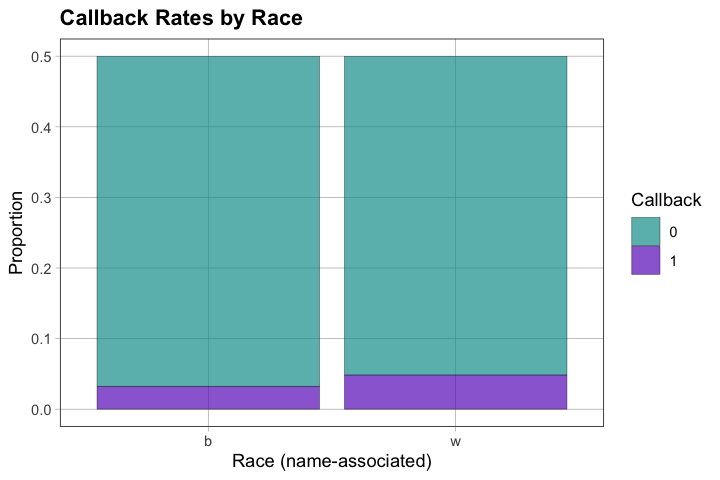

In [12]:
# Visualize callback rates by race
gf_props(~ race, fill = ~ factor(call), data = df) %>%
  gf_labs(x = "Race (name-associated)", fill = "Callback", y = "Proportion",
          title = "Callback Rates by Race")


4.5 — Interpret the difference descriptively (avoid causal language). What do you observe?

4.6 — What cautions should we keep in mind when interpreting these differences? What other factors might be at play?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Names appear to be strong indicators of race in this dataset
- White-sounding names received callback rate of [X], Black-sounding names received [Y], difference of [Z]
- Interpretation: In this dataset, resumes with White-sounding names had [X percentage points higher] callback rate than resumes with Black-sounding names
- Cautions: 
  - Names proxy race imperfectly (not all people with these names are of that race)
  - Other resume characteristics might differ between groups (though study design tried to control this)
  - Different job types might have different patterns
  - This is observational - we cannot claim causation from this analysis alone
  - Ethics: These are real people's experiences with potential discrimination

</div>


<div class="alert alert-block alert-success">

### 5.0 — Approximate Time: 8-10 mins

</div>


## 5.0 — What Makes a Resume Successful?

Since we're interested in creating effective resumes, let's explore what resume characteristics relate to callbacks.

5.1 — Explore how education level relates to callback rates. Does higher education predict more callbacks?

5.2 — What about years of experience? Do more experienced applicants get more callbacks?


In [13]:
# Education and callbacks
education_callbacks <- df %>% 
  group_by(education) %>% 
  summarize(
    n = n(),
    callback_rate = mean(call, na.rm = TRUE)
  ) %>%
  arrange(education)

education_callbacks

# Years of experience and callbacks
# Create experience groups for easier comparison
df <- df %>% 
  mutate(exp_group = case_when(
    years_exp <= 2 ~ "0-2 years",
    years_exp <= 5 ~ "3-5 years",
    years_exp <= 10 ~ "6-10 years",
    TRUE ~ "10+ years"
  ))

exp_callbacks <- df %>% 
  group_by(exp_group) %>% 
  summarize(
    n = n(),
    callback_rate = mean(call, na.rm = TRUE)
  )

exp_callbacks


education,n,callback_rate
<int>,<int>,<dbl>
0,46,0.06521739
1,40,0.07500000
2,274,0.09124088
3,1006,0.08349901
4,3504,0.07905251


exp_group,n,callback_rate
<chr>,<int>,<dbl>
0-2 years,397,0.06297229
10+ years,1010,0.11386139
3-5 years,1238,0.07189015
6-10 years,2225,0.07325843


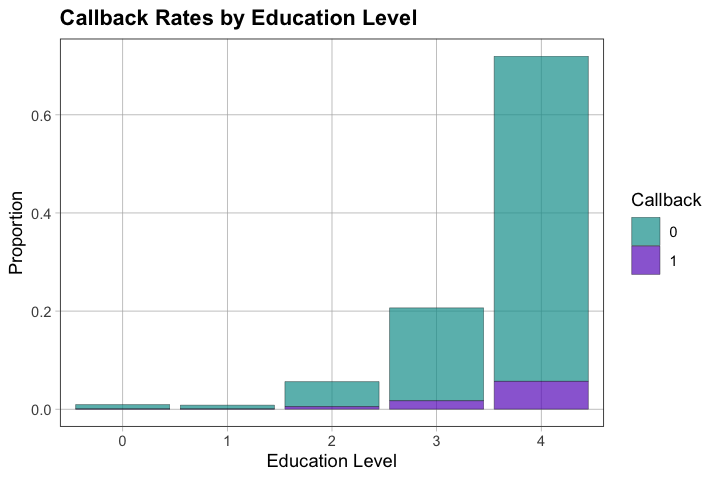

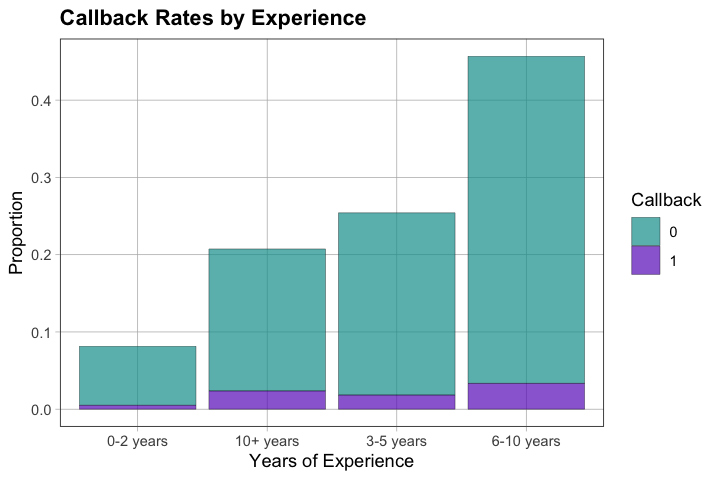

In [14]:
# Visualize education and callbacks
gf_props(~ factor(education), fill = ~ factor(call), data = df) %>%
  gf_labs(x = "Education Level", fill = "Callback", y = "Proportion",
          title = "Callback Rates by Education Level")

# Visualize experience and callbacks
gf_props(~ exp_group, fill = ~ factor(call), data = df) %>%
  gf_labs(x = "Years of Experience", fill = "Callback", y = "Proportion",
          title = "Callback Rates by Experience")


5.3 — Based on what you've explored, what would you focus on if you were creating a resume? What seems most important?

5.4 — How do these resume characteristics compare to the differences we saw by race and gender?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Education: [Describe patterns - higher education may/may not show clear pattern]
- Experience: [Describe patterns - more experience may relate to callbacks]
- Resume focus: Education, relevant experience, skills, clear formatting
- Comparison: Race/gender differences might be as large or larger than education/experience differences, highlighting the importance of understanding discrimination patterns

</div>


5.5 — Creating Effective Resumes Today

Since this study was conducted in 2004, job applications have moved almost entirely online. Most companies now use Applicant Tracking Systems (ATS), software that scans and filters resumes based on keywords, formatting, and qualifications before a human ever sees them. Many also use AI to evaluate resumes beyond basic keyword matching. While this study showed hiring bias exists, building strong skills and networking significantly improve your chances of success.

**Resume Basics**
- Use simple fonts and standard headings; avoid tables and images
- Match keywords from the job description to your resume
- Build skills through free resources: Coursera, LinkedIn Learning, YouTube, Khan Academy

**Some Tools to Streamline Applications**
- **Simplify**: Auto-fills applications and tracks progress
- **Teal**: Resume builder with ATS optimization
- **Huntr**: Job search tracker

**Beyond the Resume: Networking**

Connections often matter as much as applications. Attend career fairs, reach out to alumni in your field, connect with professionals on LinkedIn, request informational interviews, and build strong references with professors and supervisors.


<div class="alert alert-block alert-success">

### Wrap-Up — Approximate Time: 3-5 mins

</div>


### Summary and Implications

- What did we learn about callback rates by gender and race?
- What are the limitations of this study design?
- What are the implications for:
  - Creating effective resumes?
  - Understanding discrimination in hiring?
  - The broader question of fairness in employment?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Callback rates differed by gender and race, with notable differences for race
- Names are strong indicators of race in this dataset
- Limitations: Field experiment, but still can't establish causation definitively; only one time period/region
- Resume implications: Focus on qualifications, but also be aware that factors beyond your control may affect outcomes
- Discrimination: Patterns suggest potential discrimination in hiring processes
- Fairness: Raises important questions about how to ensure fair employment practices

</div>


<div class="alert alert-block alert-info">

---

## Optional Advanced Sections

The sections below use more advanced statistical concepts. You can skip these if you're focusing on descriptive analysis, or include them if you want to explore inference and modeling.

*Total additional time: ~30-45 mins*

</div>


<div class="alert alert-block alert-success">

### A1.0 — Optional Advanced: Hypotheses and Models — Approximate Time: 5-7 mins

**Prerequisite:** Chapter 01 or 08 concepts (DGP, distribution triad)

</div>


<div class="alert alert-block alert-warning">

#### Models and the Data Generating Process (DGP)

We can think about two competing models for what might have generated our data:
- **Empty model:** Data = overall mean callback rate + random error (gender/race unrelated to callbacks)
- **Explanatory model:** Data = mean + effect of gender/race + error (gender/race related to callbacks)

We use the **distribution triad** to evaluate these models:
- **The DGP** (the process that generated the data - empty or explanatory model?)
- **The Sample Distribution** (our observed data - the resumes that were sent)
- **The Sampling Distribution** (what we'd expect to see if we repeated the process many times)

</div>


A1.1 — In words, what does the empty model say about gender and callbacks?

A1.2 — In words, what does the explanatory model say, and how does it differ from the empty model?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Empty model: Gender does not affect expected callback probability; any differences are just random variation
- Explanatory model: Expected callback probability differs by gender; there's a systematic effect

</div>


<div class="alert alert-block alert-success">

### A2.0 — Optional Advanced: Shuffle Test for Gender — Approximate Time: 8-10 mins

**Prerequisite:** Chapter 04 or 08 (shuffle tests, null distributions)

</div>


## A2.0 — Shuffle Test for Gender

A2.1 — If gender were truly unrelated to callbacks (empty model), what would the difference in callback rates look like across many random samples?

A2.2 — Use the shuffle test: randomly shuffle the `call` labels many times, calculate the difference each time, and see where our observed difference falls in this null distribution.


Observed difference (Female - Male): 0.008644571 



Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."



Proportion of simulations with |difference| >= |observed|: 0.3865

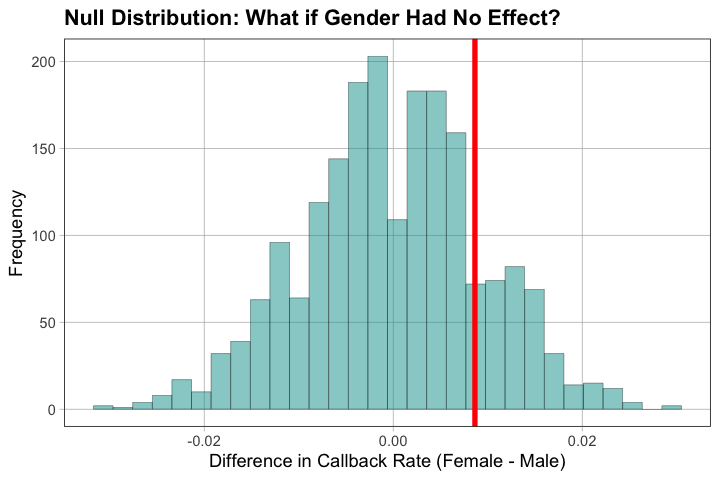

In [15]:
# Observed difference (Female - Male)
obs_diff_gender <- with(df, mean(call[sex == "f"], na.rm = TRUE) - mean(call[sex == "m"], na.rm = TRUE))
cat("Observed difference (Female - Male):", obs_diff_gender, "\n\n")

# Shuffle test: Generate null distribution
set.seed(123)
n_sims <- 2000
sim_diffs_gender <- replicate(n_sims, {
  perm <- sample(df$call)
  mean(perm[df$sex == "f"], na.rm = TRUE) - mean(perm[df$sex == "m"], na.rm = TRUE)
})

# Visualize the null distribution
gf_histogram(~ sim_diffs_gender, bins = 30) %>%
  gf_vline(xintercept = ~ obs_diff_gender, color = "red", size = 1.5) %>%
  gf_labs(x = "Difference in Callback Rate (Female - Male)",
          y = "Frequency",
          title = "Null Distribution: What if Gender Had No Effect?")

# Calculate how often we see a difference as extreme or more extreme
p_estimate <- mean(abs(sim_diffs_gender) >= abs(obs_diff_gender))
cat("\nProportion of simulations with |difference| >= |observed|:", p_estimate)


A2.3 — Where does the observed difference fall relative to the null distribution? What does this suggest about which model (empty vs. explanatory) is more plausible?

A2.4 — Using the distribution triad, explain what we've learned: What does the null distribution tell us about the DGP, sample, and sampling distribution?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Under empty model, differences should center around 0 with variation
- Observed difference is [in the tail/center] of the null distribution
- If in tail: empty model less plausible; if central: empty model plausible
- Distribution triad: Null distribution shows what the sampling distribution would look like if empty model (DGP) were true. Our observed sample difference is [consistent/inconsistent] with this.

</div>


<div class="alert alert-block alert-success">

### A3.0 — Optional Advanced: Shuffle Test for Race — Approximate Time: 8-10 mins

**Prerequisite:** Chapter 04 or 08 (shuffle tests)

</div>


## A3.0 — Shuffle Test for Race

A3.1 — Now perform the same shuffle test for race. Generate a null distribution assuming race has no effect, and compare the observed race difference to this distribution.


Observed difference (White - Black): 0.03203285 


Proportion of simulations with |difference| >= |observed|: 0

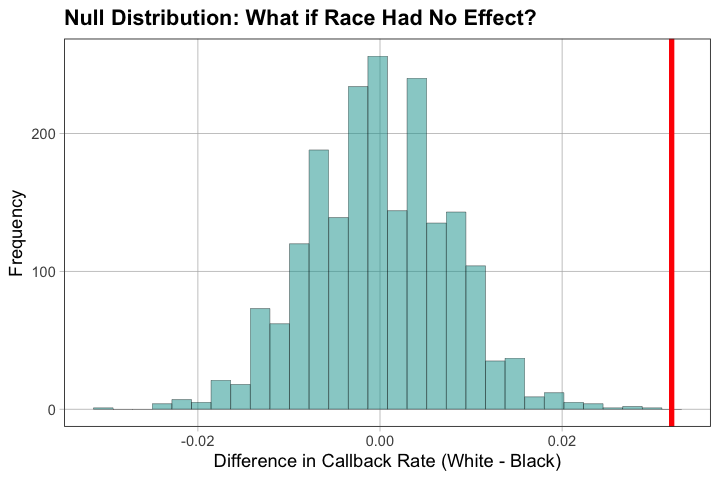

In [16]:
# Observed difference (White - Black)
obs_diff_race <- with(df, mean(call[race == "w"], na.rm = TRUE) - mean(call[race == "b"], na.rm = TRUE))
cat("Observed difference (White - Black):", obs_diff_race, "\n\n")

# Shuffle test: Generate null distribution
set.seed(456)
n_sims <- 2000
sim_diffs_race <- replicate(n_sims, {
  perm <- sample(df$call)
  mean(perm[df$race == "w"], na.rm = TRUE) - mean(perm[df$race == "b"], na.rm = TRUE)
})

# Visualize the null distribution
gf_histogram(~ sim_diffs_race, bins = 30) %>%
  gf_vline(xintercept = ~ obs_diff_race, color = "red", size = 1.5) %>%
  gf_labs(x = "Difference in Callback Rate (White - Black)",
          y = "Frequency",
          title = "Null Distribution: What if Race Had No Effect?")

# Calculate how often we see a difference as extreme or more extreme
p_estimate_race <- mean(abs(sim_diffs_race) >= abs(obs_diff_race))
cat("\nProportion of simulations with |difference| >= |observed|:", p_estimate_race)


A3.2 — Compare the results for gender and race. Which difference appears more extreme relative to chance? What does this suggest?

A3.3 — **Multiple comparisons consideration:** We've now tested both gender and race. Why might this matter when interpreting our results?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Race difference typically more extreme than gender difference in shuffle tests
- This suggests race effect is stronger/more consistent than gender effect
- Multiple comparisons: When we test multiple hypotheses, we increase chance of finding "significant" results by chance alone. Need to be cautious about interpreting multiple tests.

</div>


<div class="alert alert-block alert-success">

### A4.0 — Optional Advanced: Multiple Variable Analysis — Approximate Time: 12-15 mins

**Prerequisite:** Later chapters (group models, interactions, faceted plots)

</div>


## A4.0 — Multiple Variable Analysis

A4.1 — Does the race effect vary by education level? For example, is the callback rate difference between White and Black applicants the same for college graduates as for those with less education?

A4.2 — Explore callback rates across combinations of race and education. Create a visualization that shows this relationship.


In [17]:
# Callback rates by race and education
race_edu_callbacks <- df %>% 
  group_by(race, education) %>% 
  summarize(
    n = n(),
    callback_rate = mean(call, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(race, education)

race_edu_callbacks

# Calculate differences within each education level
race_edu_diff <- race_edu_callbacks %>%
  pivot_wider(names_from = race, values_from = callback_rate) %>%
  mutate(difference = w - b)

race_edu_diff


race,education,n,callback_rate
<chr>,<int>,<int>,<dbl>
b,0,28,0.10714286
b,1,22,0.09090909
b,2,132,0.06818182
b,3,493,0.05882353
b,4,1760,0.06477273
w,0,18,0.00000000
w,1,18,0.05555556
w,2,142,0.11267606
w,3,513,0.10721248


education,n,b,w,difference
<int>,<int>,<dbl>,<dbl>,<dbl>
0,28,0.10714286,NA,NA
1,22,0.09090909,NA,NA
2,132,0.06818182,NA,NA
3,493,0.05882353,NA,NA
4,1760,0.06477273,NA,NA
0,18,NA,0.00000000,NA
1,18,NA,0.05555556,NA
2,142,NA,0.11267606,NA
3,513,NA,0.10721248,NA


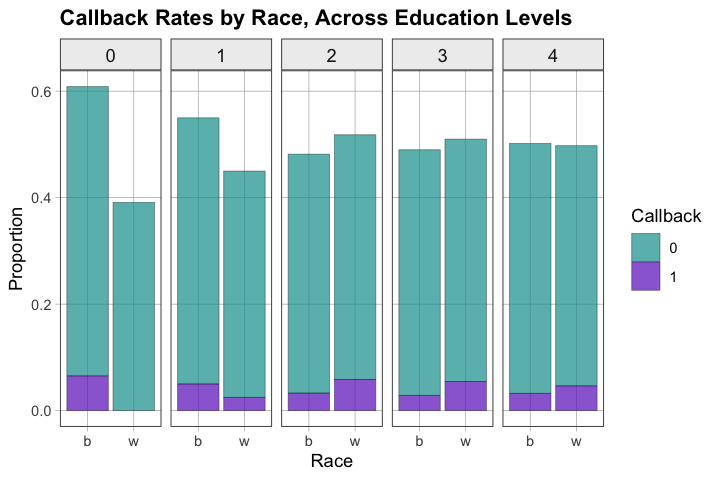

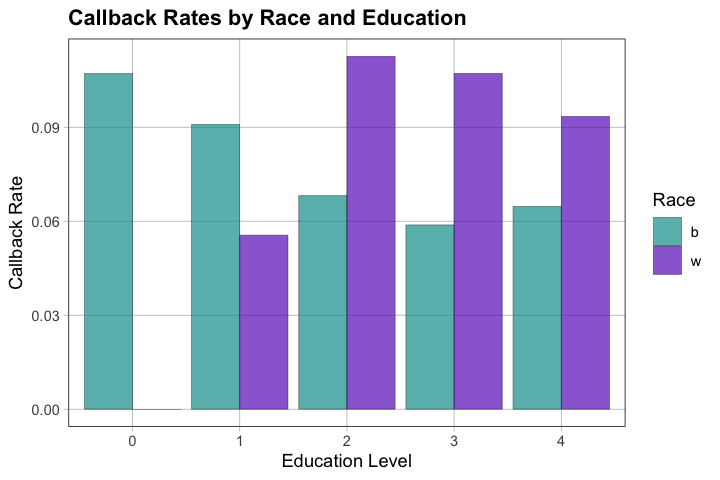

In [18]:
# Faceted plot: callback rates by race, separated by education level
gf_props(~ race, fill = ~ factor(call), data = df) %>%
  gf_facet_grid(. ~ factor(education)) %>%
  gf_labs(x = "Race", fill = "Callback", y = "Proportion",
          title = "Callback Rates by Race, Across Education Levels")

# Alternative: Grouped bar chart showing rates directly
df %>%
  group_by(race, education) %>%
  summarize(callback_rate = mean(call, na.rm = TRUE), .groups = 'drop') %>%
  gf_col(callback_rate ~ factor(education), fill = ~ race, position = "dodge") %>%
  gf_labs(x = "Education Level", y = "Callback Rate", fill = "Race",
          title = "Callback Rates by Race and Education")


A4.3 — What do you notice? Does the race difference appear consistent across education levels, or does it vary? What might this mean?

A4.4 — Why might it be important to look at multiple variables together rather than just one at a time?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Race difference may [be similar/vary] across education levels
- If consistent: effect is robust across qualifications
- If varies: might suggest discrimination is more pronounced at certain education levels, or that other factors interact
- Multiple variables: Helps understand whether effects are consistent across contexts, or if some groups are affected differently

</div>


<div class="alert alert-block alert-success">

### A5.0 — Optional Advanced: Effect Size and Practical Significance — Approximate Time: 5-7 mins

</div>


## A5.0 — Effect Size and Practical Significance

A5.1 — Calculate the callback rate difference in percentage points (not just proportions). For race, what is the difference?

A5.2 — If 100 resumes were sent for White-sounding names and 100 for Black-sounding names, how many more callbacks would White-sounding names receive on average?


In [19]:
# Calculate difference in percentage points
callback_by_race <- df %>% group_by(race) %>% summarize(callback_rate = mean(call, na.rm = TRUE))
diff_prop <- callback_by_race$callback_rate[callback_by_race$race == "w"] - 
             callback_by_race$callback_rate[callback_by_race$race == "b"]
diff_percent <- diff_prop * 100

cat("Difference in callback rate:", round(diff_prop, 4), "or", round(diff_percent, 2), "percentage points\n\n")

# Calculate practical impact: if 100 resumes sent for each group
white_rate <- callback_by_race$callback_rate[callback_by_race$race == "w"]
black_rate <- callback_by_race$callback_rate[callback_by_race$race == "b"]

cat("If 100 resumes sent for White-sounding names:", round(white_rate * 100, 1), "callbacks\n")
cat("If 100 resumes sent for Black-sounding names:", round(black_rate * 100, 1), "callbacks\n")
cat("Difference:", round((white_rate - black_rate) * 100, 1), "more callbacks for White-sounding names\n")

# Scale it up: if 1000 resumes sent
cat("\nIf 1000 resumes sent for each group:\n")
cat("White-sounding names:", round(white_rate * 1000, 0), "callbacks\n")
cat("Black-sounding names:", round(black_rate * 1000, 0), "callbacks\n")
cat("Difference:", round((white_rate - black_rate) * 1000, 0), "more callbacks for White-sounding names")


Difference in callback rate: 0.032 or 3.2 percentage points

If 100 resumes sent for White-sounding names: 9.7 callbacks
If 100 resumes sent for Black-sounding names: 6.4 callbacks
Difference: 3.2 more callbacks for White-sounding names

If 1000 resumes sent for each group:
White-sounding names: 97 callbacks
Black-sounding names: 64 callbacks
Difference: 32 more callbacks for White-sounding names

A5.3 — Is this difference "practically significant"? At what scale (10 resumes? 100? 1000?) does the difference become more meaningful?

A5.4 — Why is it important to think about both statistical significance (from shuffle tests) and practical significance (effect size)?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Difference is [X] percentage points
- At scale of 100 resumes: [Y] more callbacks
- Practical significance: Even "small" percentage point differences matter when scaled to many applicants. At individual level, each lost callback matters.
- Both important: Statistical significance tells us pattern is unlikely due to chance; practical significance tells us if the effect size matters in real-world terms.

</div>
